In [1]:
!pip install pyspark
!pip install -U -q PyDrive2
#the output 'xxx is not a symbolic link' will not affect your implementation or execution
#to fix 'xxx is not a symbolic link', you can comment out the lines starting from !mv xxxx
#you may need to replace xxx.11 with the correct version if other errors come up after colab update
#to get the correct version, use !ls /usr/local/lib to find out
!mv /usr/local/lib/libtbbmalloc_proxy.so.2 /usr/local/lib/libtbbmalloc_proxy.so.2.backup
!mv /usr/local/lib/libtbbmalloc.so.2 /usr/local/lib/libtbbmalloc.so.2.backup
!mv /usr/local/lib/libtbbbind_2_5.so.3 /usr/local/lib/libtbbbind_2_5.so.3.backup
!mv /usr/local/lib/libtbb.so.12 /usr/local/lib/libtbb.so.12.backup
!mv /usr/local/lib/libtbbbind_2_0.so.3 /usr/local/lib/libtbbbind_2_0.so.3.backup
!mv /usr/local/lib/libtbbbind.so.3 /usr/local/lib/libtbbbind.so.3.backup
!ln -s /usr/local/lib/libtbbmalloc_proxy.so.2.11 /usr/local/lib/libtbbmalloc_proxy.so.2
!ln -s /usr/local/lib/libtbbmalloc.so.2.11 /usr/local/lib/libtbbmalloc.so.2
!ln -s /usr/local/lib/libtbbbind_2_5.so.3.11 /usr/local/lib/libtbbbind_2_5.so.3
!ln -s /usr/local/lib/libtbb.so.12.11 /usr/local/lib/libtbb.so.12
!ln -s /usr/local/lib/libtbbbind_2_0.so.3.11 /usr/local/lib/libtbbbind_2_0.so.3
!ln -s /usr/local/lib/libtbbbind.so.3.11 /usr/local/lib/libtbbbind.so.3
# !sudo ldconfig
#If error related to the above execution occurs, you can try commenting out the above 12 lines under pip install PyDrive2 (not included)
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#the output 'xxx is not a symbolic link' will not affect your implementation or execution
#to fix 'xxx is not a symbolic link', you can comment out the lines starting from !mv xxxx
#you may need to replace xxx.11 with the correct version if other errors come up after colab update
#to get the correct version, use !ls /usr/local/lib to find out


openjdk-8-jdk-headless is already the newest version (8u432-ga~us1-0ubuntu2~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import numpy as np
import pandas as pd

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [3]:
k = 10
MAX_ITER = 20

**Part (a) :**

In [4]:
data = sc.textFile("data.txt")


In [5]:
c1 = sc.textFile("c1.txt")
c2 = sc.textFile("c2.txt")

In [6]:
data = data.map(lambda x: np.array([float(num) for num in x.split(" ")]))

In [7]:
c1 = c1.map(lambda x: [float(num) for num in x.split(" ")])
c2 = c2.map(lambda x: [float(num) for num in x.split(" ")])

In [8]:
c1 = c1.collect()
c2 = c2.collect()

In [9]:
c1.sort()
c2.sort()

In [10]:
c1 = [np.array(centroid) for centroid in c1]
c2 = [np.array(centroid) for centroid in c2]

In [11]:
data.take(3)

[array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
          0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
        278.   ,   1.   ]),
 array([2.100e-01, 2.800e-01, 5.000e-01, 0.000e+00, 1.400e-01, 2.800e-01,
        2.100e-01, 7.000e-02, 0.000e+00, 9.400e-01, 2.100e-01, 7.900e-01,
        6.500e-01, 2.100e-01, 1.400e-01, 1.400e-01, 7.000e-02, 2.800e-01,
        3.470e+00, 0.000e+00, 1.590e+00, 0.000e+00, 4.300e-01, 4.300e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.00

In [12]:
c = c1

In [13]:
def initialize_data_euclidean(data_point):
  distances = [(np.sum((data_point - c[i]) ** 2), i) for i in range(len(c))]
  distances.sort()
  return (data_point, distances[0][1], distances[0][0])

In [14]:
data = data.map(initialize_data_euclidean)

In [15]:
data.take(3)

[(array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
           0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
         278.   ,   1.   ]),
  5,
  0.0),
 (array([2.100e-01, 2.800e-01, 5.000e-01, 0.000e+00, 1.400e-01, 2.800e-01,
         2.100e-01, 7.000e-02, 0.000e+00, 9.400e-01, 2.100e-01, 7.900e-01,
         6.500e-01, 2.100e-01, 1.400e-01, 1.400e-01, 7.000e-02, 2.800e-01,
         3.470e+00, 0.000e+00, 1.590e+00, 0.000e+00, 4.300e-01, 4.300e-01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       

In [16]:
def assign_centroids_euclidean(data_point):
  distances = [(np.sum((data_point[0] - c[i]) ** 2), i) for i in range(len(c))]
  distances.sort()
  return (data_point[0], distances[0][1], distances[0][0])

In [17]:
cost = []

In [18]:
for _ in range(MAX_ITER):
  data.cache()
  cost.append(data.map(lambda x: x[2]).sum())
  c = data.map(lambda x: (x[1], (x[0], 1))).\
    reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).\
    map(lambda x: (x[0], x[1][0] / x[1][1])).\
    map(lambda x: x[1].tolist()).collect()
  c.sort()
  c = [np.array(centroid) for centroid in c]
  data = data.map(assign_centroids_euclidean)

In [19]:
print(cost)

[623660345.3064115, 509862908.2975454, 485480681.8720084, 463997011.68501294, 460969266.5729968, 460537847.9827684, 460313099.6535447, 460003523.8894081, 459570539.3177352, 459021103.3422909, 458490656.1919812, 457944232.5879751, 457558005.1986773, 457290136.35230196, 457050555.05956286, 456892235.61535585, 456703630.7370345, 456404203.01897514, 456177800.541994, 455986871.0273468]


In [20]:
import matplotlib.pyplot as plt

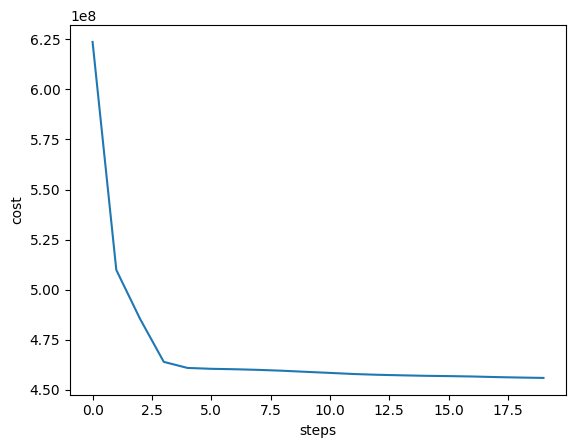

In [21]:
plt.xlabel("steps")
plt.ylabel("cost")
plt.plot(cost[:20])

In [22]:
c = c2

In [23]:
data = sc.textFile("data.txt")
data = data.map(lambda x: np.array([float(num) for num in x.split(" ")]))

In [24]:
data = data.map(initialize_data_euclidean)
data.take(3)

[(array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
           0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
         278.   ,   1.   ]),
  2,
  0.0),
 (array([2.100e-01, 2.800e-01, 5.000e-01, 0.000e+00, 1.400e-01, 2.800e-01,
         2.100e-01, 7.000e-02, 0.000e+00, 9.400e-01, 2.100e-01, 7.900e-01,
         6.500e-01, 2.100e-01, 1.400e-01, 1.400e-01, 7.000e-02, 2.800e-01,
         3.470e+00, 0.000e+00, 1.590e+00, 0.000e+00, 4.300e-01, 4.300e-01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       

In [25]:
cost2 = []
for _ in range(MAX_ITER):
  data.cache()
  cost2.append(data.map(lambda x: x[2]).sum())
  c = data.map(lambda x: (x[1], (x[0], 1))).\
    reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).\
    map(lambda x: (x[0], x[1][0] / x[1][1])).\
    map(lambda x: x[1].tolist()).collect()
  c.sort()
  c = [np.array(centroid) for centroid in c]
  data = data.map(assign_centroids_euclidean)

In [26]:
print(cost2)

[438747790.02791756, 249803933.62600276, 194494814.40631256, 169804841.4515432, 156295748.8062759, 149094208.10896596, 142508531.61961532, 132303869.40652987, 117170969.83719075, 108547377.17857003, 102237203.3179959, 98278015.74975666, 95630226.12177408, 93793314.051193, 92377131.96821073, 91541606.25423889, 91045573.83042458, 90752240.10140811, 90470170.18122731, 90216416.1756313]


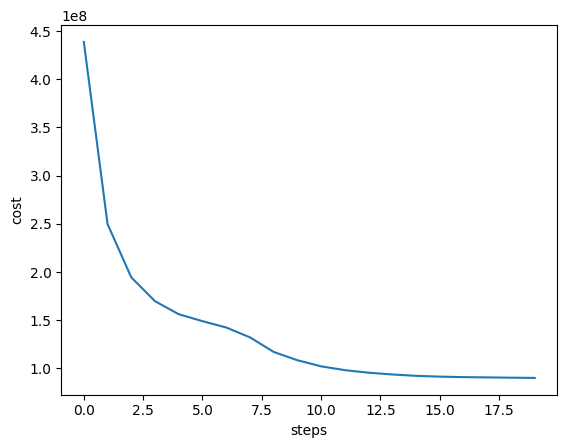

In [27]:
plt.xlabel("steps")
plt.ylabel("cost")
plt.plot(cost2[:20])

In [28]:
print("For c1, the percentage change is ", int((cost[0] - cost[10]) / cost[0] * 100), "%")

For c1, the percentage change is  26 %


In [29]:
print("For c2, the percentage change is ", int((cost2[0] - cost2[10]) / cost2[0] * 100), "%")

For c2, the percentage change is  76 %


In [30]:
print(cost[19], cost2[19])

455986871.0273468 90216416.1756313


In this case, the random initialization c1 is worse than the fixed initialization c2. c2 has both larger percentage change and lower final cost. This is because by using the initialization given by c2, points very far away from each other are more likely assigned to different clusters in the beginning.

**Part (b):**

In [31]:
c1 = sc.textFile("c1.txt")
c2 = sc.textFile("c2.txt")
c1 = c1.map(lambda x: [float(num) for num in x.split(" ")])
c2 = c2.map(lambda x: [float(num) for num in x.split(" ")])
c1 = c1.collect()
c2 = c2.collect()
c1.sort()
c2.sort()
c1 = [np.array(centroid) for centroid in c1]
c2 = [np.array(centroid) for centroid in c2]

In [32]:
c = c1

In [33]:
def initialize_data_manhattan(data_point):
  distances = [((np.sum(np.abs(data_point - c[i])), i)) for i in range(len(c))]
  distances.sort()
  return (data_point, distances[0][1], distances[0][0])

In [34]:
def assign_centroids_manhattan(data_point):
  distances = [(np.sum(np.abs(data_point[0] - c[i])), i) for i in range(len(c))]
  distances.sort()
  return (data_point[0], distances[0][1], distances[0][0])

In [35]:
data = sc.textFile("data.txt")
data = data.map(lambda x: np.array([float(num) for num in x.split(" ")]))

In [36]:
data = data.map(initialize_data_manhattan)

In [37]:
data.take(3)

[(array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
           0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
           0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
         278.   ,   1.   ]),
  5,
  0.0),
 (array([2.100e-01, 2.800e-01, 5.000e-01, 0.000e+00, 1.400e-01, 2.800e-01,
         2.100e-01, 7.000e-02, 0.000e+00, 9.400e-01, 2.100e-01, 7.900e-01,
         6.500e-01, 2.100e-01, 1.400e-01, 1.400e-01, 7.000e-02, 2.800e-01,
         3.470e+00, 0.000e+00, 1.590e+00, 0.000e+00, 4.300e-01, 4.300e-01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       

In [38]:
cost = []
for _ in range(MAX_ITER):
  data.cache()
  cost.append(data.map(lambda x: x[2]).sum())
  c = data.map(lambda x: (x[1], (x[0], 1))).\
    reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).\
    map(lambda x: (x[0], x[1][0] / x[1][1])).\
    map(lambda x: x[1].tolist()).collect()
  c.sort()
  c = [np.array(centroid) for centroid in c]
  data = data.map(assign_centroids_manhattan)

In [39]:
print(cost)

[550117.1419999995, 464450.0252791685, 471231.8639471617, 484151.1538744597, 489233.6301247303, 487521.4493619469, 483384.7322016907, 475307.21579009807, 474966.74737782264, 457244.14435123396, 447513.2804903239, 451014.31411148934, 451222.0932561679, 451973.8467044317, 451585.35588920704, 452756.6454326384, 452893.79235098936, 450382.2340958831, 450023.96886379004, 448929.4744988641]


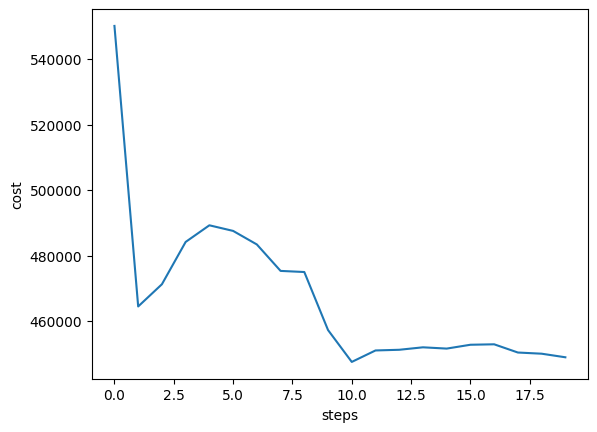

In [40]:
plt.xlabel("steps")
plt.ylabel("cost")
plt.plot(cost[:20])

In [41]:
c = c2
data = sc.textFile("data.txt")
data = data.map(lambda x: np.array([float(num) for num in x.split(" ")]))
data = data.map(initialize_data_manhattan)

In [42]:
cost2 = []
for _ in range(MAX_ITER):
  data.cache()
  cost2.append(data.map(lambda x: x[2]).sum())
  c = data.map(lambda x: (x[1], (x[0], 1))).\
    reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).\
    map(lambda x: (x[0], x[1][0] / x[1][1])).\
    map(lambda x: x[1].tolist()).collect()
  c.sort()
  c = [np.array(centroid) for centroid in c]
  data = data.map(assign_centroids_manhattan)

In [43]:
print(cost2)

[1433739.3099999954, 1084488.7769648773, 973431.7146620404, 895934.5925630709, 865128.3352940814, 845846.647031348, 827219.5827561249, 803590.3456011118, 756039.5172761207, 717332.9025432297, 694587.9252526882, 684444.5019967903, 674574.7475478561, 667409.4699160281, 663556.6278215044, 660162.7772287563, 656041.3222947121, 653036.7540731612, 651112.4262522729, 649689.0131843555]


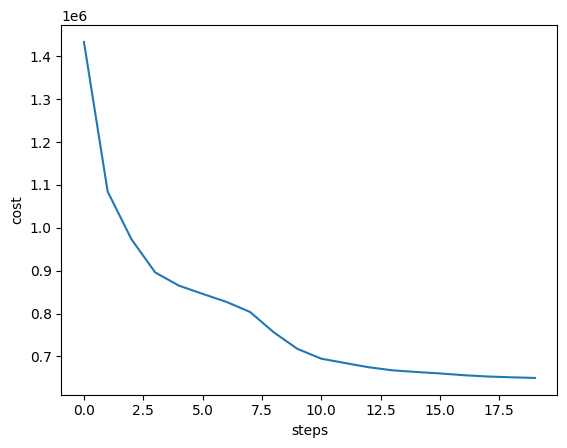

In [44]:
plt.xlabel("steps")
plt.ylabel("cost")
plt.plot(cost2[:20])

In [45]:
print("For c1, the percentage change is ", int((cost[0] - cost[10]) / cost[0] * 100), "%")
print("For c2, the percentage change is ", int((cost2[0] - cost2[10]) / cost2[0] * 100), "%")

For c1, the percentage change is  18 %
For c2, the percentage change is  51 %


In [46]:
print(cost[19], cost2[19])

448929.4744988641 649689.0131843555


In this case, c1 has a lower final cost and thus it is better. This is because the Euclidean distance is not directly related to the Manhattan distance, and the initialization given by c2 is not necessarily a good initialization for the Manhattan distance, and actually the initial cost of c2 is even higher unlike part (a).